In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [6]:
def choose(n,r):
    return (np.math.factorial(n))/(np.math.factorial(r)*np.math.factorial(n-r))

# จั่ว 5 ใบ มีใบแก้ไม่เกิน 2 ใบ 

In [4]:
def prob1(x,n):
    ne = choose(n,1)*choose(x-n,4)+choose(n,2)*choose(x-n,3)
    ns = choose(x,5)

    y = (ne/ns)
    return y

In [9]:
prob1(40,6)

0.5592880329722435

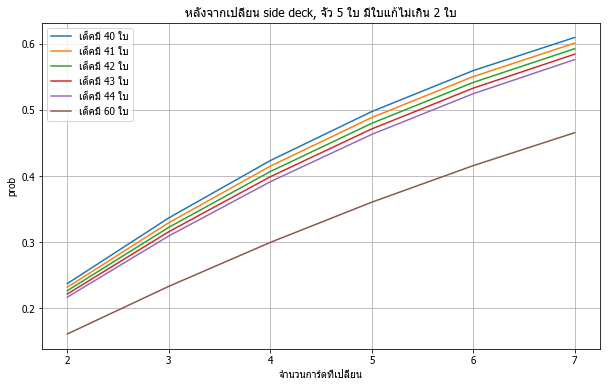

แต่ต้องระวังว่า ยิ่งเปลี่ยนเยอะ เราก็จะเพิ่มโอกาสที่จะจั่วไม่ได้ของเล่นเหมือนกัน ดังนั้นใบที่ควรเอาออกควรจะเป็นสามัญที่คาดว่าจะไม่ได้ใช้


In [10]:
plt.figure(figsize=[10,6])
for x in [40,41,42,43,44,60]:
    plt.plot(range(2,8),[prob1(x,n) for n in range(2,8)], label=f'เด็คมี {x} ใบ')
plt.legend()
plt.title('หลังจากเปลี่ยน side deck, จั่ว 5 ใบ มีใบแก้ไม่เกิน 2 ใบ')
plt.xlabel('จำนวนการ์ดที่เปลี่ยน')
plt.ylabel('prob')
plt.grid()
plt.show()

print('แต่ต้องระวังว่า ยิ่งเปลี่ยนเยอะ เราก็จะเพิ่มโอกาสที่จะจั่วไม่ได้ของเล่นเหมือนกัน ดังนั้นใบที่ควรเอาออกควรจะเป็นสามัญที่คาดว่าจะไม่ได้ใช้')

# ควรใส่สามัญกี่ใบ เพื่อไม่ให้ brick
## สมมติ ratio ที่เหมาะสมคือ ของเล่น 3 สามัญ 2
## แสดงว่าเราจะหาความน่าจะเป็นที่จะจั่วได้ของเล่น 3 และสามัญ 2
x = จำนวนการ์ดในเด็ค,
n = จำนวนการ์ดสามัญ,
x-n = ของเล่น,
จะกลายเป็นว่า x-nเลือก3, nเลือก2

In [18]:
def prob2(x,n):
    ne = choose(n,2)*choose(x-n,3)
    ns = choose(x,5)

    y = (ne/ns)
    return y

In [19]:
prob2(40,15)

0.3670168143852354

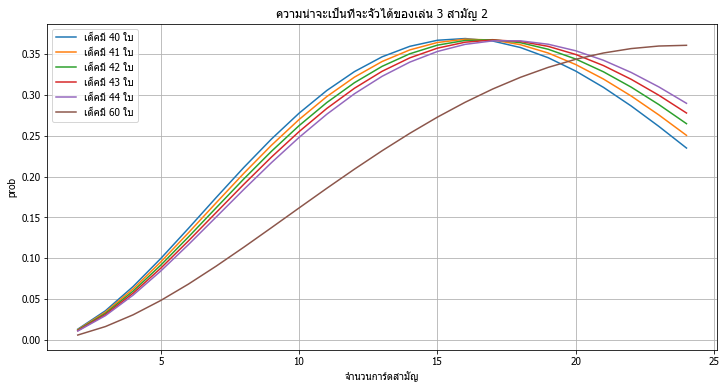

In [20]:
plt.figure(figsize=[12,6])
for x in [40,41,42,43,44,60]:
    plt.plot(range(2,25),[prob2(x,n) for n in range(2,25)], label=f'เด็คมี {x} ใบ')
plt.legend()
plt.title('ความน่าจะเป็นที่จะจั่วได้ของเล่น 3 สามัญ 2')
plt.xlabel('จำนวนการ์ดสามัญ')
plt.ylabel('prob')
plt.grid()
plt.show()

# สมมติเปลี่ยนเป็นของเล่น 4 สามัญ 1

In [21]:
def prob3(x,n):
    ne = choose(n,1)*choose(x-n,4)
    ns = choose(x,5)

    y = (ne/ns)
    return y

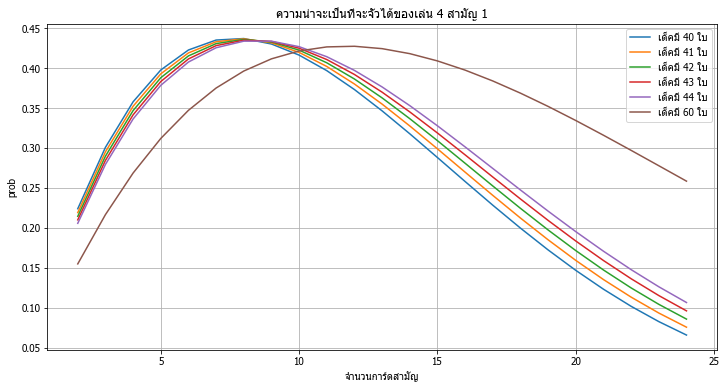

In [22]:
plt.figure(figsize=[12,6])
for x in [40,41,42,43,44,60]:
    plt.plot(range(2,25),[prob3(x,n) for n in range(2,25)], label=f'เด็คมี {x} ใบ')
plt.legend()
plt.title('ความน่าจะเป็นที่จะจั่วได้ของเล่น 4 สามัญ 1')
plt.xlabel('จำนวนการ์ดสามัญ')
plt.ylabel('prob')
plt.grid()
plt.show()

# starter 1-2 from 5 in deck x in first turn

In [38]:
def starter(x,n):
    ne = choose(n,1)*choose(x-n,4) + choose(n,2)*choose(x-n,3)
    ns = choose(x,5)

    y = (ne/ns)
    return y

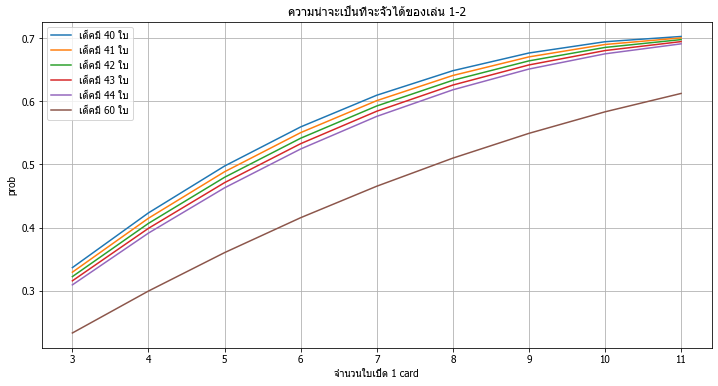

In [39]:
plt.figure(figsize=[12,6])
for x in [40,41,42,43,44,60]:
    plt.plot(range(3,12),[starter(x,n) for n in range(3,12)], label=f'เด็คมี {x} ใบ')
plt.legend()
plt.title('ความน่าจะเป็นที่จะจั่วได้ของเล่น 1-2')
plt.xlabel('จำนวนใบเปิด 1 card')
plt.ylabel('prob')
plt.grid()
plt.show()

# In 1 deck with 1 card combo Avg is 15 Staple+Handtrap 10 Starter 10 Extender 5 Brick
# Cal prop start hand 5 card have 0-1 brick 2 staple 1 starter 1-2 extender

In [2]:
def choose(n,r):
    return (np.math.factorial(n))/(np.math.factorial(r)*np.math.factorial(n-r)) #  n!/( r! * (n-r)! )

Example Firewall deck

In [16]:
Starter = 9
Extender = 9
Brick = 7
Staple = 5
Handtrap = 11
Deck = Starter + Extender + Brick + Staple + Handtrap
Deck

41

In [33]:
def DeckCal(Starter,Extender,Brick,Staple,Handtrap,WantStarter,WantExtender,WantBrick,Other):
    StaHT = Staple + Handtrap
    ns =  choose(Deck,5)
    ne = choose(Starter,WantStarter)*choose(Extender,WantExtender)*choose(Brick,WantBrick)*choose(StaHT,Other)

    prop = ne/ns
    return prop*100 

DeckCal(9,9,7,5,11 ,1,0,1,3)

4.707778777098418

In [32]:
def PlayAble(Starter,Extender,Brick,Staple,Handtrap,  WantStarter):
    Deck = Starter + Extender + Brick + Staple + Handtrap
    print("deck : " + str(Deck))
    ns =  choose(Deck,5)
    ne = choose(Starter,WantStarter)*choose(Deck-Starter,5 - WantStarter)

    prop = ne/ns
    return prop*100 

print(PlayAble(6,9,7,5,11 ,1)) #deck 39 starter 6

print(PlayAble(7,9,7,5,11 ,1)) #deck 40 starter 7

print(PlayAble(8,9,7,5,11 ,1)) #deck 41 starter 8

print(PlayAble(9,9,7,5,11 ,1)) #deck 42 starter 9

deck : 38
42.98504608102131
deck : 39
43.7198331935174
deck : 40
43.7198331935174
deck : 41
43.18666449603548


In [47]:
def PlayAble2(Starter,Deck):
    ns =  choose(Deck,5)
    ne = choose(Starter,1)*choose(Deck-Starter,4)

    prop = ne/ns
    return prop*100 

In [70]:
data = []

In [72]:

for i in range(40,43):
    for j in range(7,10):
        d = "{:.3f}".format(PlayAble2(j,i))
        AD = (i,j,d)
        print(AD)
        data.append(AD)

(40, 7, '43.531')
(40, 8, '43.720')
(40, 9, '43.037')
(41, 7, '43.319')
(41, 8, '43.683')
(41, 9, '43.187')
(42, 7, '43.086')
(42, 8, '43.614')
(42, 9, '43.293')


In [73]:
data
sorted_data = sorted(data, key=lambda x: x[2], reverse=True)

In [74]:
sorted_data

[(40, 8, '43.720'),
 (40, 8, '43.720'),
 (41, 8, '43.683'),
 (41, 8, '43.683'),
 (42, 8, '43.614'),
 (42, 8, '43.614'),
 (40, 7, '43.531'),
 (40, 7, '43.531'),
 (41, 7, '43.319'),
 (41, 7, '43.319'),
 (42, 9, '43.293'),
 (42, 9, '43.293'),
 (41, 9, '43.187'),
 (41, 9, '43.187'),
 (42, 7, '43.086'),
 (42, 7, '43.086'),
 (40, 9, '43.037'),
 (40, 9, '43.037')]

In [75]:
def HT12(HT,Deck):
    ns =  choose(Deck,5)
    ne = choose(HT,1)*choose(Deck-HT,4) + choose(HT,2)*choose(Deck-HT,3)

    prop = ne/ns
    return prop*100 

In [76]:
HT12(8,40)

64.82595956280167

In [102]:
dataHT = []
for i in range(40,41):
    for j in range(6,12):
        d = "{:.3f}".format(HT12(j,i))
        AD = (i,j,d)
        dataHT.append(AD)
sorted_dataHT = sorted(dataHT, key=lambda x: x[2], reverse=True)
sorted_dataHT


[(40, 11, '70.247'),
 (40, 10, '69.414'),
 (40, 9, '67.629'),
 (40, 8, '64.826'),
 (40, 7, '60.944'),
 (40, 6, '55.929')]

In [105]:
dataX = []
for i in range(40,42):
    for j in range(4,10):
        d = "{:.3f}".format(PlayAble2(j,i))
        AD = (i,j,d)
        dataX.append(AD)
sorted_dataX = sorted(dataX, key=lambda x: x[2], reverse=True)
sorted_dataX

[(40, 8, '43.720'),
 (41, 8, '43.683'),
 (40, 7, '43.531'),
 (41, 7, '43.319'),
 (41, 9, '43.187'),
 (40, 9, '43.037'),
 (40, 6, '42.288'),
 (41, 6, '41.922'),
 (40, 5, '39.787'),
 (41, 5, '39.302'),
 (40, 4, '35.808'),
 (41, 4, '35.252')]

# Best ratio in Firewall  
Starter 8  
Extender 9  
Handtrap 10  
Staple 5  
Brick 8    

# Calculate Process
1. Find number fix play card in deck then classified  
2. Find range of all type card
3. Find deck size range
4. Calculate & config

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


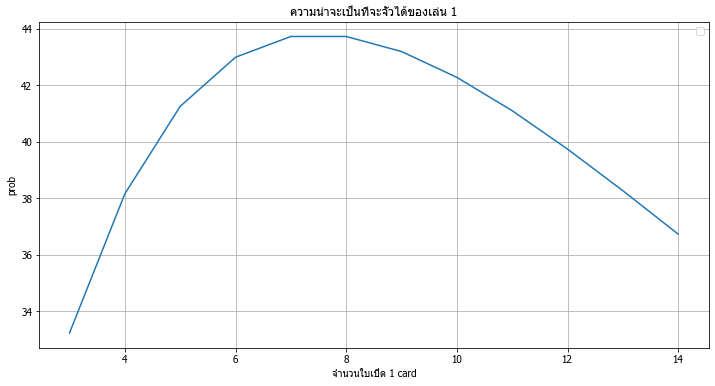

In [21]:
plt.figure(figsize=[12,6])
plt.plot(range(3,15),[PlayAble(x,9,7,5,11 ,1) for x in range(3,15)]) #8 starter -> deck 40
plt.legend()
plt.title('ความน่าจะเป็นที่จะจั่วได้ของเล่น 1')
plt.xlabel('จำนวนใบเปิด 1 card')
plt.ylabel('prob')
plt.grid()
plt.show()

# Case 2 card combo Cal prop start hand 5 card that can be play able
condition  
have 2 combo piece  
no brick  
have 1 staple counter handtrap  
have 1 extender  
Example deck:   
![deck img](https://mljar.com/blog/jupyter-notebook-insert-image/banner.jpg)

In [37]:
ComboP1 = 6
ComboP1 = 7
Extender = 9
Brick = 8
Staple = 2
Handtrap = 8
Deck = Starter + Extender + Brick + Staple + Handtrap
Deck

35

# Prop counter Maxx "c"
Maxx "c" 3 VS Urara 3 Called 2 Crossout 1 => 3 vs 6

In [45]:
def VSMaxxC(x,n):
    ne = choose(n,1)*choose(x-n,4)
    ns = choose(x,5)

    y = (ne/ns)
    return y

In [19]:
def DrawMaxxC(x):
    ne = choose(3,1)*choose(x-3,4)
    ns = choose(x,5)

    y = (ne/ns)
    return y
DrawMaxxC(40)

0.30111336032388664

In [51]:
VSMaxxC(60,6)

0.34743235939058636

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


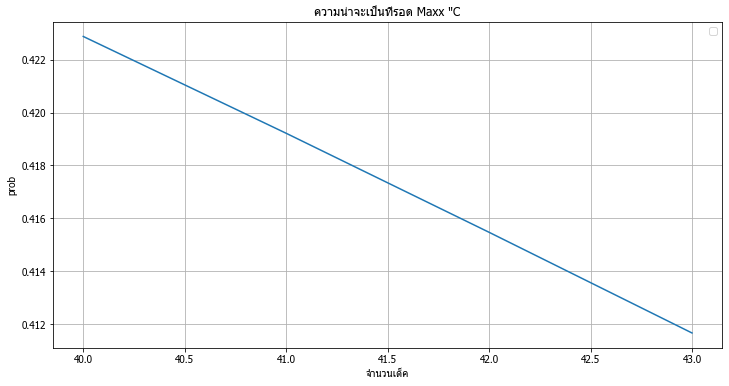

In [55]:
plt.figure(figsize=[12,6])
plt.plot(range(40,44),[VSMaxxC(x,6) for x in range(40,44)])
plt.legend()
plt.title('ความน่าจะเป็นที่รอด Maxx "C')
plt.xlabel('จำนวนเด็ค')
plt.ylabel('prob')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


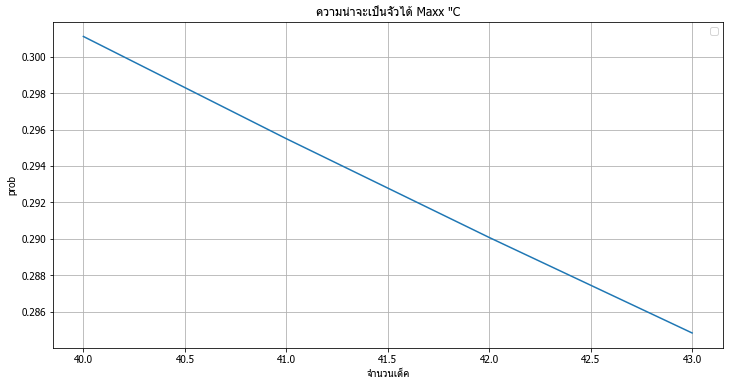

In [20]:
plt.figure(figsize=[12,6])
plt.plot(range(40,44),[DrawMaxxC(x) for x in range(40,44)])
plt.legend()
plt.title('ความน่าจะเป็นจั่วได้ Maxx "C')
plt.xlabel('จำนวนเด็ค')
plt.ylabel('prob')
plt.grid()
plt.show()

# ความน่าจะเป็นที่จะจั่วได้สามัญอย่างน้อย 1 แต่ไม่เกิน 2 ใบ

In [25]:
def prob4(x,n):
    ne = choose(n,1)*choose(x-n,4)+choose(n,2)*choose(x-n,3)
    ns = choose(x,5)

    y = (ne/ns)
    return y

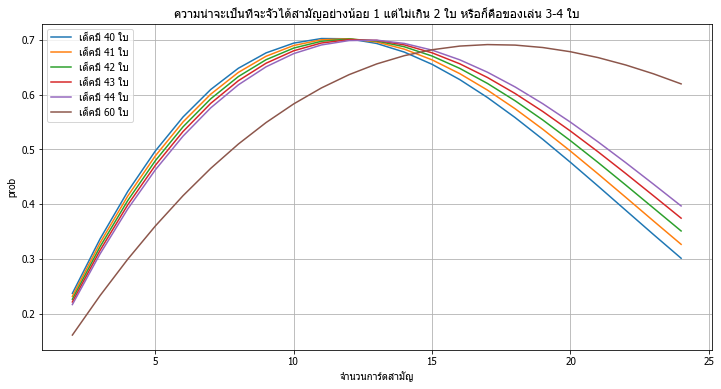

In [26]:
plt.figure(figsize=[12,6])
for x in [40,41,42,43,44,60]:
    plt.plot(range(2,25),[prob4(x,n) for n in range(2,25)], label=f'เด็คมี {x} ใบ')
plt.legend()
plt.title('ความน่าจะเป็นที่จะจั่วได้สามัญอย่างน้อย 1 แต่ไม่เกิน 2 ใบ หรือก็คือของเล่น 3-4 ใบ')
plt.xlabel('จำนวนการ์ดสามัญ')
plt.ylabel('prob')
plt.grid()
plt.show()

# side deck trade-off: การยอมเอาของเล่นออกจากเด็คแล้วไปใส่ของแก้แทน
## โอกาสที่จะแก้เด็คได้ vs โอกาสที่จะทำคอมโบของเด็คตัวเอง

In [27]:
#สมมติ fix ว่า เด็ค 40 ใบ, ของเล่น adjust ได้
#y คือจำนวนของเล่นในเด็ค สมมติ 25
#n คือจำนวนการ์ดจาก side deck ที่เอามาแทนของเล่นในเด็ค

#ความน่าจะเป็นที่จะจั่วได้ของเล่น 3-4 ใบ และ side เด็คที่ถูกเปลี่ยนเข้ามา
def prob5(y,n):
    ne = choose(y-n,3)*choose(n,2)+choose(y-n,4)*choose(n,1)
    ns = choose(x,5)

    y = (ne/ns)
    return y

In [28]:
prob5(25,2)

0.0035669609441488

# ความน่าจะเป็นที่จะเจอคนเกิดวันเดียวกันอย่างน้อย 2 คน จากจำนวนคนในห้อง n คน

In [13]:
def birthday_prob(n):
    # ความน่าจะเป็นที่จะไม่เจอคนเกิดวันเดียวกันเลย แล้วเอา 1 ลบ
    ne = 365
    day = 364
    for i in range(n-1):
        ne = ne*day
        day = day-1
    ns = 365**n
    
    pe = 1-(ne/ns)
    return pe

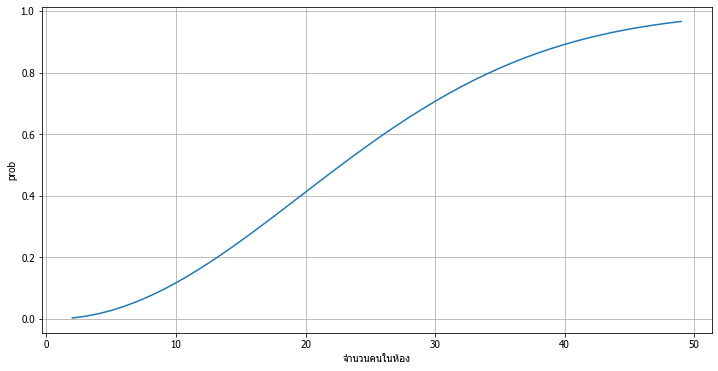

In [14]:
plt.figure(figsize=[12,6])
plt.plot(range(2,50),[birthday_prob(n) for n in range(2,50)])
plt.grid()
plt.xlabel('จำนวนคนในห้อง')
plt.ylabel('prob')
plt.show()